In [9]:
using Plots
using DataFrames
using CSV
using LaTeXStrings
using Clapeyron

#### Defining the Model using Clapeyron.jl

In [10]:
model = SAFTgammaMie([("sulfur dioxide",["SO2"=>1])];
        userlocations=(Mw = [64.1],
        epsilon = [235.09],
        sigma = [2.8953],
        lambda_a = [6.],
        lambda_r = [12.351],
        vst = [3.],
        S = [0.79386], 
        n_e=[0],
        n_H=[0],
        epsilon_assoc=nothing,
        bondvol=nothing));

#### Setting the Critical Temperature, Pressure and Volume

In [11]:
Tc = crit_pure(model)[1] ;
pc = crit_pure(model)[2];
vc = crit_pure(model)[3];
rho_c = 1/vc;

In [12]:
N = 120;
T = LinRange(Tc-300, Tc, N);
p = zeros(N);
vl = zeros(N);
vv = zeros(N);
rho_l = zeros(N);
rho_v = zeros(N);

#### Vectors of length N for pressure, liq. vol, vap. vol, liq. density, vap. density

In [13]:
for i in 1:N
    sat = saturation_pressure(model, T[i])
    p[i] = sat[1]
    vl[i] = sat[2]
    vv[i] = sat[3]
    rho_l[i] = 1.0/sat[2]
    rho_v[i] = 1.0/sat[3]
end

#### Importing the experimental data from CSV file

In [140]:
v_p = CSV.read("SO2_vp_Clap.csv",
               header=[1, 2, 3],
               DataFrame);
v_p_high_T = CSV.read("SO2_vp_Clap_Hi-T.csv", 
                     header=[1, 2, 3],
                     DataFrame);

rho_liq = CSV.read("SO2_rho_liq_sat_Clap.csv",
                   header=[1, 2, 3],
                   DataFrame);
rho_liq_high_T = CSV.read("SO2_rho_liq_sat_Hi-T_Clap.csv",
                          header=[1, 2, 3], 
                          DataFrame);
rho_vap = CSV.read("SO2_rho_vap_sat_Clap.csv",
                          header=[1, 2, 3], 
                          DataFrame);

In [141]:
N_exp = size(v_p)[1];
N_exp_high_T = size(v_p_high_T)[1];

N_rho_exp = size(rho_liq)[1];
N_rho_exp_high_T = size(rho_liq_high_T)[1];
N_rho_exp_vap = size(rho_vap)[1];

In [142]:
T_vp_exp = zeros(N_exp);
p_exp = zeros(N_exp);

T_vp_exp_high_T = zeros(N_exp_high_T);
p_exp_high_T = zeros(N_exp_high_T);

T_rho_exp = zeros(N_rho_exp);
rho_exp = zeros(N_rho_exp);

T_rho_exp_high_T = zeros(N_rho_exp_high_T);
rho_exp_high_T = zeros(N_rho_exp_high_T);

T_rho_vap = zeros(N_rho_exp_vap);
rho_exp_vap = zeros(N_rho_exp_vap);

#### Plotting

In [148]:
T_vp_exp = v_p[:, 1];
p_exp = v_p[:, 2];

T_vp_exp_high_T = v_p_high_T[:, 1];
p_exp_high_T = v_p_high_T[:, 2];

T_rho_exp = rho_liq[:, 1];
rho_exp = rho_liq[:, 2];

T_rho_exp_high_T = rho_liq_high_T[:, 1];
rho_exp_high_T = rho_liq_high_T[:, 2];

T_rho_exp_vap = rho_vap[:, 1];
rho_exp_vap = rho_vap[:, 2];

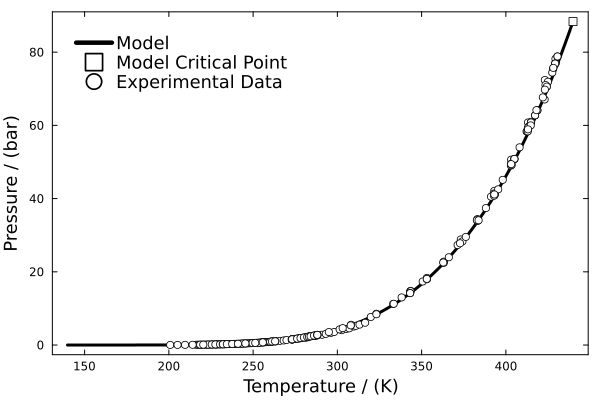

In [154]:
plt = plot(grid = :off, 
           framestyle = :box, 
           foreground_color_legend = nothing, 
           legend_font = font(12))

plot!(plt, T, p./1e5, 
      color = "black", 
      line = (:path, 3), 
      label = "Model")

plot!(plt, [Tc], [pc]./1e5, 
      seriestype = :scatter, 
      color = "white", 
      markerstrokecolor = "black",
      marker = :square,
      line = (:scatter, 0.5), 
      label = "Model Critical Point")

plot!(plt, T_vp_exp, p_exp./1e5, 
      seriestype = :scatter, 
      color = "white", 
      markerstrokecolor = "black", 
      line = (:scatter, 0.4), 
      label = "Experimental Data")

plot!(plt, T_vp_exp_high_T, p_exp_high_T./1e5, 
      seriestype = :scatter, 
      color = "white", 
      markerstrokecolor = "black", 
      line = (:scatter, 0.4), 
      label = false)

xlabel!(plt, "Temperature / (K)", xguidefontsize = 12)
ylabel!(plt, "Pressure / (bar)", yguidefontsize = 12)

In [92]:
maximum(p_exp./1e5)

58.358

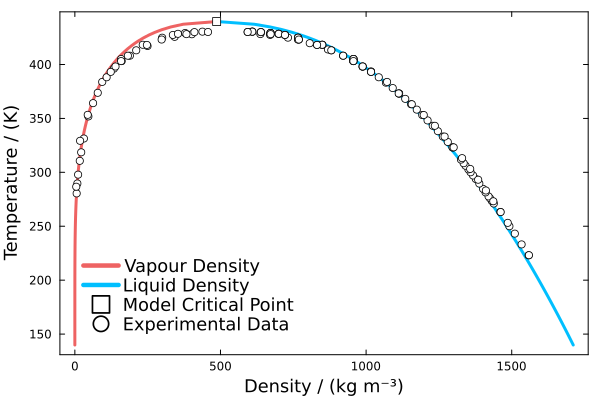

In [155]:
Mw = 64.1/1000
colours = ["indianred2", "deepskyblue1"]

plt2 = plot(grid = :off, 
           framestyle = :box, 
           foreground_color_legend = nothing, 
           legend_font = font(12),
           legend = :bottomleft)

plot!(plt2, rho_v.*Mw, T, 
      color = colours[1], 
      line = (:path, 3), 
      label = "Vapour Density")

plot!(plt2, rho_l.*Mw, T,
      color = colours[2],
      line = (:path, 3),
      label = "Liquid Density")

plot!(plt2, [rho_c].*Mw, [Tc],
      seriestype=:scatter, 
      color="white", 
      markerstrokecolor="black", 
      marker = :square,
      line = (:scatter, 0.5),
      label = "Model Critical Point")

plot!(plt2, rho_exp.*Mw, T_rho_exp,
      seriestype=:scatter,
      color="white",
      markerstrokecolor="black", 
      line = (:scatter, 0.5),
      label = "Experimental Data")

plot!(plt2, rho_exp_high_T.*Mw, T_rho_exp_high_T,
      seriestype=:scatter,
      color="white",
      markerstrokecolor="black", 
      line = (:scatter, 0.5),
      label = false)

plot!(plt2, rho_exp_vap.*Mw, T_rho_exp_vap,
      seriestype=:scatter,
      color="white",
      markerstrokecolor="black", 
      line = (:scatter, 0.5),
      label = false)

xlabel!(plt2, "Density / (kg m⁻³)", yguidefontsize=12)
ylabel!(plt2, "Temperature / (K)", xguidefontsize=12)

Cant find experimental data...

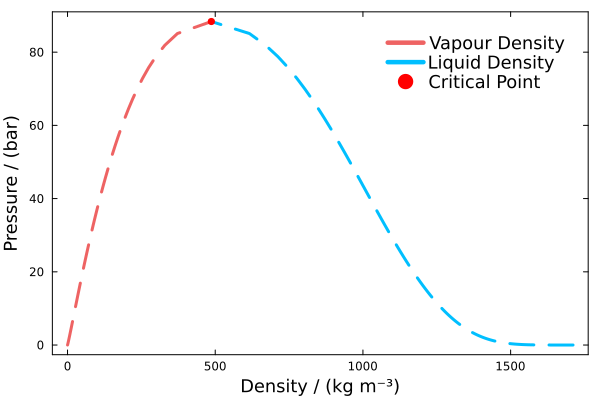

In [116]:
plt3 = plot(grid = :off, 
           framestyle = :box, 
           foreground_color_legend = nothing, 
           legend_font = font(12),
           legend = :topright)

plot!(plt3, rho_v.*Mw, p./1e5, 
      color = colours[1], 
      line = (:dash, 3), 
      label = "Vapour Density")

plot!(plt3, rho_l.*Mw, p./1e5,
      color = colours[2],
      line = (:dash, 3),
      label = "Liquid Density")

#=
plot!(plt3, rho_exp.*Mw, p_exp./1e5,
      seriestype=:scatter,
      color="black",
      markerstrokecolor="black", 
      line = (:scatter, 0.5),
      label = "Experimental Data")
=#

plot!(plt3, [rho_c].*Mw, [pc]./1e5,
      seriestype=:scatter, 
      color="red", 
      markerstrokecolor="red", 
      line = (:scatter, 0.5),
      label = "Critical Point")

xlabel!(plt3, "Density / (kg m⁻³)", yguidefontsize=12)
ylabel!(plt3, "Pressure / (bar)", xguidefontsize=12)